In [1]:
from field_manager_api.field_manager import FieldManagerAPI
import importlib

### Adding your user token

Access to the Field Manager API is controlled using tokens. To retrieve your token, go to [the Field Manager Developer Portal](https://app.test.fieldmanager.io/developer). This page shows the documentation for the API, i.e., all the endpoints and their inputs and outputs.

For now, just click `get_token` in the upper right corner:

<img src="get_token.png" width="40">

Copy the token you get into the string below.


In [2]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJQZGRrU2pfVGpwWEpQTnVXNjlkaEFkQTRiNE0xLVlJU24yMVRMQ2NRd24wIn0.eyJleHAiOjE3Mjc5NDg3MDYsImlhdCI6MTcyNzk0MTUwNiwiYXV0aF90aW1lIjoxNzI3OTQxNTA1LCJqdGkiOiI4YTFlYTNkMS1mYmJlLTQzYzQtODBmYS1jNDdmNDU1ZDg4NWUiLCJpc3MiOiJodHRwczovL2tleWNsb2FrLnRlc3QubmdpYXBpLm5vL2F1dGgvcmVhbG1zL3RlbmFudC1nZW9odWItcHVibGljIiwiYXVkIjpbIm5naWxpdmUtbGthYi1ncmFmYW5hdjIiLCJjb3BpdC1vYXV0aC1wcm94eSIsIm5naWxpdmUtbmdpLWdyYWZhbmF2MiIsImFjY291bnQiXSwic3ViIjoiNWZhZjFlMDQtNWNkNy00OGRiLWFlMjYtOGVlZDQxOGNlZTcwIiwidHlwIjoiQmVhcmVyIiwiYXpwIjoiZmllbGRtYW5hZ2VyLWNsaWVudCIsIm5vbmNlIjoiMDE1ZDNiMjktODg1ZC00ZWM5LTlmZjctMDc2N2M4NWI3YjZjIiwic2Vzc2lvbl9zdGF0ZSI6ImRjM2JlMDI3LTUyNmEtNGQ0OC04MmE2LTcwMDdiZTVkMDM4MCIsImFsbG93ZWQtb3JpZ2lucyI6WyJodHRwczovL2FwcC50ZXN0LmZpZWxkbWFuYWdlci5pbyIsImh0dHA6Ly9sb2NhbGhvc3Q6ODUwMSJdLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsidGVuYW50LWdlb2h1Yi1wdWJsaWMiLCJuZ2lfbm9yd2F5X29yZyIsImRlZmF1bHQtcm9sZXMtdGVuYW50LWdlb2h1Yi1wdWJsaWMiLCJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsibmdpbGl2ZS1sa2FiLWdyYWZhbmF2MiI6eyJyb2xlcyI6WyJWaWV3ZXIiXX0sImNvcGl0LW9hdXRoLXByb3h5Ijp7InJvbGVzIjpbImNvcGl0LWFjY2VzcyJdfSwibmdpbGl2ZS1uZ2ktZ3JhZmFuYXYyIjp7InJvbGVzIjpbIlZpZXdlciJdfSwiYWNjb3VudCI6eyJyb2xlcyI6WyJtYW5hZ2UtYWNjb3VudCIsIm1hbmFnZS1hY2NvdW50LWxpbmtzIiwidmlldy1wcm9maWxlIl19LCJmaWVsZG1hbmFnZXItY2xpZW50Ijp7InJvbGVzIjpbInZpZXdlciIsImVkaXRvciIsInZpZXdlci1vcmctODcwNTI1YjItOGYyYi00ZDI0LThhMTItMGJlNzY2NjI4ZmIzIiwiZWRpdG9yLXByb2otNDUwMTRiZGMtNzRiNC00OWU4LTkwMWYtMjkwZjM2NjI1MDAxIiwiYWRtaW4iLCJhZG1pbi1wcm9qLWIyNWYzM2NmLTJiMGYtNDIzZi04YmY4LWFjMmZlN2FiMzlmZCIsInJlZmVyZW5jZS1wcm9qLWIyNWYzM2NmLTJiMGYtNDIzZi04YmY4LWFjMmZlN2FiMzlmZCIsInJlZmVyZW5jZSIsInJlZmVyZW5jZS1vcmctODcwNTI1YjItOGYyYi00ZDI0LThhMTItMGJlNzY2NjI4ZmIzIiwiYWRtaW4tb3JnLTg3MDUyNWIyLThmMmItNGQyNC04YTEyLTBiZTc2NjYyOGZiMyIsInJlZmVyZW5jZS1wcm9qLWFhOWRkM2NkLTgzNzUtNDE1ZC1hNzY5LWEyYTFjZWFlYmZmMyIsImFkbWluLXByb2otYWE5ZGQzY2QtODM3NS00MTVkLWE3NjktYTJhMWNlYWViZmYzIiwicmVmZXJlbmNlLXByb2otNDUwMTRiZGMtNzRiNC00OWU4LTkwMWYtMjkwZjM2NjI1MDAxIl19fSwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBwcm9qZWN0OnJlYWQgbWFwLW9yZy1jbGFpbSBlbWFpbCIsInNpZCI6ImRjM2JlMDI3LTUyNmEtNGQ0OC04MmE2LTcwMDdiZTVkMDM4MCIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJvcmciOiI4NzA1MjViMi04ZjJiLTRkMjQtOGExMi0wYmU3NjY2MjhmYjMiLCJuYW1lIjoiSW5nZWJvcmcgR2plcmRlIiwicHJlZmVycmVkX3VzZXJuYW1lIjoiaW5nZWJvcmcuZ2plcmRlQG5naS5ubyIsImdpdmVuX25hbWUiOiJJbmdlYm9yZyIsImZhbWlseV9uYW1lIjoiR2plcmRlIiwiZW1haWwiOiJpbmdlYm9yZy5namVyZGVAbmdpLm5vIn0.knmkvZdrGdlKj1YgOGR2Ih_XnFIH-_WK1R8HwUkANU-DyAXOjTCGR1AO-INXFy2a7CQex42n_F5OMzTo9YLkAYGObyJ0y-1xugJLMch2-fc2USS5Nuz_aQoTVV4wIdkVz4hQlZRDToiVmot3SyGWGXGeDxgK8JOOENySyNRfnejIGYqx7Pf_d-0HFPKBuH0JEg-QL529sy40AY4jLMMR2eiK3Ii-FeyZXD3nks24ZCvwm4y9rsQfJu7QA6coBwN1IaNxD0c4vZTO7HjOv7wUuf7u0bvWz6XzF2X15mfyKUylAotzOyqiPq6hQh8iDaOcyYO515VY_xKMQfPsYRSgqA"
fm = FieldManagerAPI()
fm.set_token(token)

Field Manager API init
Token set successfully


The token expires after 30 minutes, at which pointy you should make a new one.

## Importing data

The `Field Manager API` is a python package that simplifies using the API.

If you know the name of the project, you can look up all projects with names containing some substring:


In [3]:
project_names = fm.search_for_project_name(substring="TellefTest")
print(project_names)
project = fm.get_project_by_name(project_names[0])

['TellefTesterTing']


We take the first match.

Data is structured hierarchically within the `project`:

- `project`s have `locations`, i.e., a list of `Location` classes
- `locations`s have `methods`, i.e., a list of `Method` classes
- `method`s have `method_data`, which is a pandas dataframe:


In [4]:
df = project.locations[3].methods[0].data
df

,depth,updated_at,remarks,comment_code,penetration_rate,penetration_force,hammering_pressure,hammering,engine_pressure,torque,rotation_rate,flushing,flushing_pressure,flushing_flow,created_at
0,0.025,2024-09-17T13:17:11.966905Z,None,NaN,3.848,0.492,None,False,2.173,0.050,7.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
1,0.050,2024-09-17T13:17:11.966905Z,None,NaN,18.720,0.789,None,False,2.169,0.014,24.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
2,0.075,2024-09-17T13:17:11.966905Z,None,NaN,18.942,1.130,None,False,2.187,0.000,24.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
3,0.100,2024-09-17T13:17:11.966905Z,None,NaN,18.750,1.756,None,False,2.201,0.000,24.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
4,0.125,2024-09-17T13:17:11.966905Z,None,NaN,18.770,2.119,None,False,2.221,0.000,24.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,22.100,2024-09-17T13:17:11.966905Z,None,NaN,20.420,19.659,None,False,7.360,0.550,57.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
884,22.125,2024-09-17T13:17:11.966905Z,None,NaN,20.428,20.791,None,False,7.194,0.410,57.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
885,22.150,2024-09-17T13:17:11.966905Z,None,NaN,21.344,21.022,None,False,8.310,0.394,56.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z
886,22.175,2024-09-17T13:17:11.966905Z,None,NaN,21.456,21.176,None,False,7.840,0.394,57.0,False,0.0,0.0,2024-09-17T13:17:11.966905Z


You can easily drop columns you're not interested in


In [5]:
df = project.locations[3].methods[0].data
df.drop(
    columns=["updated_at", "created_at", "comment_code", "remarks"],
    errors="ignore",
    inplace=True,
)
df

,depth,penetration_rate,penetration_force,hammering_pressure,hammering,engine_pressure,torque,rotation_rate,flushing,flushing_pressure,flushing_flow
0,0.025,3.848,0.492,None,False,2.173,0.050,7.0,False,0.0,0.0
1,0.050,18.720,0.789,None,False,2.169,0.014,24.0,False,0.0,0.0
2,0.075,18.942,1.130,None,False,2.187,0.000,24.0,False,0.0,0.0
3,0.100,18.750,1.756,None,False,2.201,0.000,24.0,False,0.0,0.0
4,0.125,18.770,2.119,None,False,2.221,0.000,24.0,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
883,22.100,20.420,19.659,None,False,7.360,0.550,57.0,False,0.0,0.0
884,22.125,20.428,20.791,None,False,7.194,0.410,57.0,False,0.0,0.0
885,22.150,21.344,21.022,None,False,8.310,0.394,56.0,False,0.0,0.0
886,22.175,21.456,21.176,None,False,7.840,0.394,57.0,False,0.0,0.0


In [6]:
from field_manager_api.utils.folium_plotter import MapHandler

mh = MapHandler(project.locations, tiles="OpenTopoMap", height="300px", width="80%")
mh.plot_locations()

If you hover of the locations, a tooltip will display the _location index_ and a list of methods performed at the location. E.g.,If you want to examine the method data associated with e.g. the 0th method on the 2nd location, write


In [7]:
df_full = project.locations[2].methods[0].data
df_full.head()

,depth,updated_at,penetration_rate,penetration_force,fs,comment_code,conductivity,zero_value_resistance,zero_value_friction,zero_value_pressure,temperature,qc,remarks,tilt,u2,created_at
0,2.00,2024-09-25T12:26:00.444172Z,None,0.0,28.0,NaN,None,7.3466,130.8,258.9,12.5,1.316,None,0.56,344.0,2024-09-25T12:26:00.444172Z
1,2.02,2024-09-25T12:26:00.444172Z,None,0.0,41.0,NaN,None,NaN,NaN,NaN,7.8,2.276,None,0.70,154.0,2024-09-25T12:26:00.444172Z
2,2.04,2024-09-25T12:26:00.444172Z,None,0.0,44.0,NaN,None,NaN,NaN,NaN,7.8,2.117,None,0.61,126.0,2024-09-25T12:26:00.444172Z
3,2.06,2024-09-25T12:26:00.444172Z,None,0.0,51.0,NaN,None,NaN,NaN,NaN,7.8,1.917,None,0.67,125.0,2024-09-25T12:26:00.444172Z
4,2.08,2024-09-25T12:26:00.444172Z,None,0.0,52.0,NaN,None,NaN,NaN,NaN,7.8,1.850,None,0.73,144.0,2024-09-25T12:26:00.444172Z


You can easily drop columns you're not interested in,


In [8]:
df = df_full.drop(
    columns=["updated_at", "remarks", "comment_code", "conductivity", "created_at"]
)
df.head()

,depth,penetration_rate,penetration_force,fs,zero_value_resistance,zero_value_friction,zero_value_pressure,temperature,qc,tilt,u2
0,2.00,None,0.0,28.0,7.3466,130.8,258.9,12.5,1.316,0.56,344.0
1,2.02,None,0.0,41.0,NaN,NaN,NaN,7.8,2.276,0.70,154.0
2,2.04,None,0.0,44.0,NaN,NaN,NaN,7.8,2.117,0.61,126.0
3,2.06,None,0.0,51.0,NaN,NaN,NaN,7.8,1.917,0.67,125.0
4,2.08,None,0.0,52.0,NaN,NaN,NaN,7.8,1.850,0.73,144.0


or only grab the data you want


In [9]:
df = df_full[["depth", "fs", "qc", "u2"]]

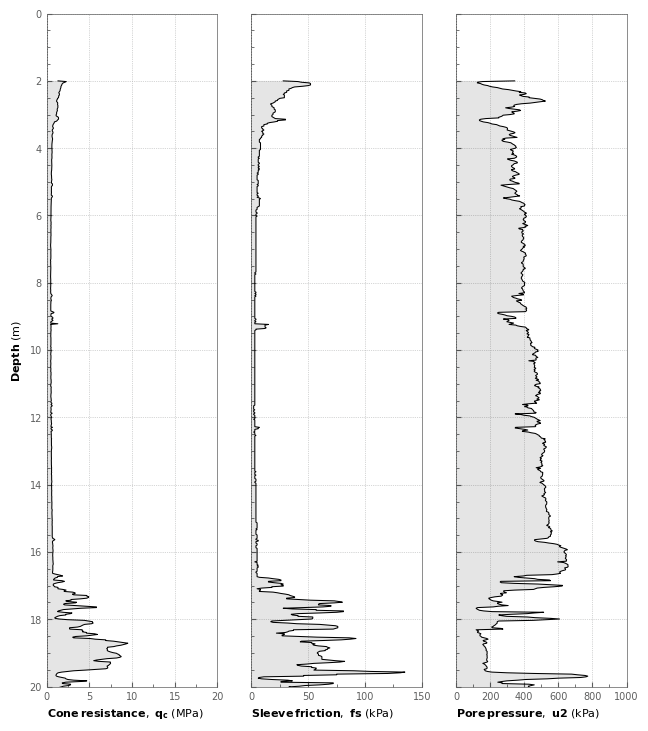

In [12]:
from ngi_plot_matplotlib.geotechnical_plots.cpt import CPTPlot, CPTPlotOptions
from ngi_plot_matplotlib.styles import ColorMode, Grayscale
cpt_plot_options = CPTPlotOptions(color_mode=ColorMode = ColorMode.GRAYSCALE)
df_plot = df_full.copy(deep=True)
df_plot["cpt_name"]= "CPT1"
cpt_plot = CPTPlot(data=df_plot)